In [1]:
import pandas as pd
from pathlib import Path

import fastbook
from fastbook import *
from fastai.tabular.all import *

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
Path.cwd()

Path('/home/ja/ml/AgingClock_git/notebooks')

In [3]:
DATA_PATH = Path.cwd()/'data'
train_df = pd.read_csv(DATA_PATH/'train_data.csv')
test_df = pd.read_csv(DATA_PATH/'test_data.csv')
df = pd.read_csv(DATA_PATH/'full_data.csv')

In [4]:
train_idx = np.array(range(len(train_df))).tolist()
test_idx = np.array(range(len(test_df)))
test_idx = (test_idx + train_idx[-1] + 1).tolist()

In [5]:
cont = list(df.columns)[1:-1]
cat = list(df.columns)[0:1]
dep_var = list(df.columns)[-1]
procs = [Categorify]

In [6]:
dls = TabularDataLoaders.from_df(df, DATA_PATH, procs=procs, cat_names=cat, cont_names=cont, 
                                 y_names=dep_var, valid_idx=test_idx, bs=64, device=device)

In [7]:
learn = tabular_learner(dls, layers=[400, 100], y_range=(20, 90), loss_func=mae)

/home/ja/miniconda3/envs/fastAI/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


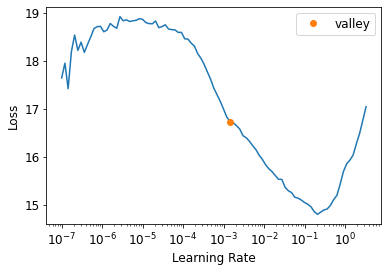

In [8]:
lr = learn.lr_find().valley

In [9]:
learn.fit_one_cycle(10, lr)
#400->100

epoch,train_loss,valid_loss,time
0,11.314528,10.746878,00:02
1,10.785441,10.721823,00:02
2,10.332302,10.189747,00:02
3,10.167392,10.068083,00:02
4,10.159884,9.901990,00:03
5,10.035618,9.806038,00:03
6,9.818385,9.772427,00:03
7,9.717997,9.766747,00:03
8,9.468997,9.819865,00:03
9,9.479643,9.745074,00:03


In [11]:
learn.show_results()

,GENDER,Albumin_mgl,Glucose_mmolL,Urea_mmolL,Cholesterol_mmolL,Protein_gdL,Sodium_mmolL,Creatinine_mgdl,Hemoglobin_gdl,Bilirubin_umolL,Triglyceride_mmolL,HDL_mmolL,LDL_mmolL,Calcium_mmolL,Potassium_mmolL,Hematocrit_%,MCHC_gdl,MCV_fL,Platelet_TuL,RBC_MuL,AGE,AGE_pred
0,2.0,-0.093809,0.532008,0.095643,-1.978281,-0.790705,0.327223,-0.187274,0.308309,-0.010681,-0.336228,-1.171409,-1.627491,-0.736575,0.652979,0.428004,-0.427458,-1.329561,-0.775764,1.271009,80.0,60.997921
1,1.0,0.109884,0.680914,3.115534,-0.700566,0.800328,1.575135,-0.847614,-1.231310,-0.346413,-0.278644,0.151737,-0.769619,-0.453949,0.479690,-1.752280,1.977550,-0.726517,-0.729813,-1.333696,72.0,75.134613
2,2.0,-0.141348,0.141938,-0.746351,-0.747198,-0.989585,-0.088748,-0.705187,0.244158,0.325050,-0.653579,-0.485333,-0.410210,-1.584452,1.057321,0.110046,0.374211,0.284469,0.847833,-0.070219,54.0,51.741421
3,1.0,-0.144979,-0.843217,-0.073696,-0.047718,0.999208,1.575135,-1.339631,0.629063,0.325050,-0.235136,1.425877,-0.576009,1.524432,0.190874,0.768673,-0.327250,0.018420,-0.974884,0.707305,60.0,60.231064
4,2.0,-0.128143,-0.157493,0.095643,0.838289,-0.194068,-0.504718,-0.083691,-0.204897,0.660781,-0.653579,0.396764,1.028491,-0.453949,0.479690,-0.071644,-0.327250,-0.460468,-1.541611,0.163038,62.0,59.209450
5,1.0,-0.145310,-0.516810,-0.746351,-0.943052,0.402570,-0.920689,-1.456162,-0.974707,4.018094,-1.000361,1.033834,-1.156838,-1.867078,0.190874,-1.207209,0.775046,-0.318575,0.587445,-1.003248,35.0,37.721878
6,1.0,-0.144319,-0.454766,0.264983,-1.595899,-1.188464,-0.920689,-0.407387,-0.076596,-0.346413,-0.334948,0.788807,-2.038243,-0.736575,-0.097941,-0.185201,0.374211,0.727884,0.388324,-0.595048,43.0,38.747627
7,2.0,-0.106354,-0.606369,2.447583,-0.411448,0.203691,0.743193,1.534789,0.949817,-0.682144,-1.057945,-0.607847,0.198430,-0.736575,-0.675572,0.859518,0.574628,1.135826,-1.143370,0.124162,54.0,49.752621
8,1.0,-0.141018,-0.487137,-1.249666,-1.689163,0.203691,0.743193,-0.912353,-1.680366,-0.010681,-0.480827,-1.171409,-1.240272,0.393929,-0.097941,-1.638723,-0.227041,-0.708781,0.173887,-1.236505,28.0,28.881853


In [12]:
mae(*learn.get_preds())

TensorBase(9.7451)

In [14]:
learn.save(DATA_PATH.parent/'models'/'fastai400_100')

Path('/home/ja/ml/AgingClock_git/models/fastai400_100.pth')

In [9]:
learn.fit_one_cycle(20, lr)
#400->200->200->100
#wd=0.1

epoch,train_loss,valid_loss,time
0,11.481717,10.977438,00:03
1,10.872914,10.688433,00:03
2,10.656961,10.578587,00:03
3,10.458300,10.046350,00:04
4,10.434835,9.972797,00:04
5,10.284797,10.079956,00:04
6,10.166248,9.869340,00:04
7,10.064276,9.843473,00:04
8,9.839072,9.781896,00:04
9,9.793007,9.758695,00:04


In [9]:
learn.fit_one_cycle(20, lr)
#200->100

epoch,train_loss,valid_loss,time
0,11.413301,11.308286,00:02
1,10.852147,10.597186,00:02
2,10.591706,10.406789,00:02
3,10.366802,10.266760,00:02
4,10.354404,10.107334,00:02
5,10.215595,9.984682,00:02
6,10.095641,9.831632,00:02
7,9.996206,9.939905,00:02
8,9.794772,9.840554,00:02
9,9.789939,9.815574,00:02
